In [1]:
import pandas as pd
import numpy as np

In [24]:
path = "/data/jerrylee/pjt/BIGFAM.v.2.0/data/supple"

df = pd.DataFrame()
for cohort in ["UKB", "GS"]:
    fn = f"{path}/{cohort}.prediction.sigV.tsv"
    tmp = pd.read_csv(fn, sep="\t")
    tmp["cohort"] = cohort
    df = pd.concat([df, tmp])
    
df

,pheno,slope,intercept,significant,Vg_median,Vg_lower,Vg_upper,Vs_median,Vs_lower,Vs_upper,w_median,w_lower,w_upper,cohort
0,Albumin,1.066854,-1.534255,Similar,0.227976,0.223726,0.260808,0.050632,0.035357,0.053142,0.43,0.40000,0.49,UKB
1,Apolipoprotein_B,1.063831,-1.492979,Similar,0.257683,0.225940,0.262014,0.040658,0.038414,0.052964,0.40,0.40000,0.48,UKB
2,Arm_fat_mass__left_,0.947650,-1.286429,Similar,0.346639,0.304732,0.350495,0.041484,0.039784,0.063083,0.60,0.53000,0.60,UKB
3,Arm_fat_mass__right_,0.939090,-1.259711,Similar,0.333609,0.306810,0.338859,0.049164,0.047002,0.063515,0.60,0.54000,0.60,UKB
4,Arm_fat_percentage__left_,0.912777,-1.159509,Slow,0.442239,0.440619,0.443752,0.015562,0.015165,0.016009,0.95,0.95000,0.95,UKB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Potassium,0.910384,-1.795034,Similar,0.222988,0.213153,0.301301,0.042864,0.002907,0.049032,0.53,0.40000,0.60,GS
6,QRS_axis,0.848359,-2.704889,Similar,0.112553,0.111996,0.162139,0.024752,0.006493,0.030539,0.60,0.43475,0.60,GS
7,QT_interval,0.869146,-1.898481,Similar,0.200798,0.198774,0.221362,0.039830,0.039253,0.044124,0.59,0.43000,0.60,GS
8,Total_cholesterol,0.601850,-2.384421,Slow,0.177781,0.176747,0.178867,0.035561,0.035252,0.035973,0.95,0.95000,0.95,GS


In [25]:
df[["Vg_median", "Vs_median", "w_median"]].agg(["mean", "std"])


,Vg_median,Vs_median,w_median
mean,0.353414,0.042993,0.674753
std,0.144957,0.036100,0.251374


In [28]:
1 / 0.674753, 1 / 0.251374

(1.4820237924099633, 3.9781361636446095)

array([[<Axes: title={'center': 'Vs_median'}>]], dtype=object)

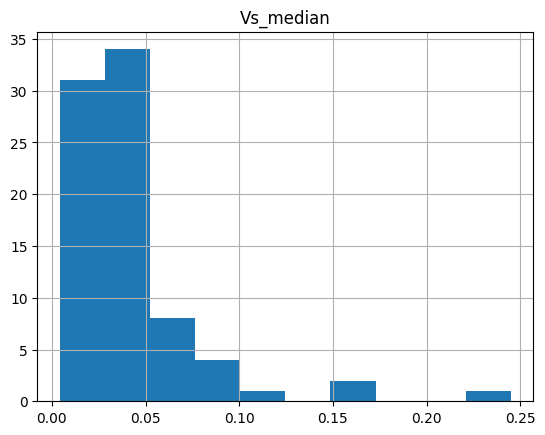

In [26]:
df.sort_values("Vs_median", ascending=False)[["cohort", "pheno", "Vs_median"]].hist()

In [33]:
df.sort_values("Vs_median", ascending=False)[["cohort", "pheno", "Vs_median", "Vs_lower", "Vs_upper"]].round(3)

,cohort,pheno,Vs_median,Vs_lower,Vs_upper
54,UKB,Standing_height,0.245,0.164,0.398
30,UKB,Immature_reticulocyte_fraction,0.158,0.022,0.164
45,UKB,Neutrophill_percentage,0.156,0.040,0.161
1,GS,expected,0.106,0.105,0.107
2,GS,FVC,0.096,0.094,0.098
...,...,...,...,...,...
64,UKB,Urea,0.013,0.013,0.014
28,UKB,High_light_scatter_reticulocyte_percentage,0.009,0.009,0.037
48,UKB,Red_blood_cell__erythrocyte__count,0.008,0.005,0.068
40,UKB,Leg_fat-free_mass__right_,0.007,0.001,0.083


In [31]:
df.sort_values("w_median", ascending=True)[["cohort", "pheno", "w_median"]]

,cohort,pheno,w_median
63,UKB,Urate,0.01
33,UKB,Impedance_of_whole_body,0.01
49,UKB,Red_blood_cell__erythrocyte__distribution_width,0.02
1,UKB,Apolipoprotein_B,0.40
34,UKB,LDL_direct,0.40
...,...,...,...
4,GS,max_leg,0.95
3,GS,max_arm,0.95
2,GS,FVC,0.95
64,UKB,Urea,0.95
